<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/Children_clothing_sizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=05cbbd333834c632086ec849672b4524ebe2f5f8d6347bda735798cb118ba972
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


67.93046905855141


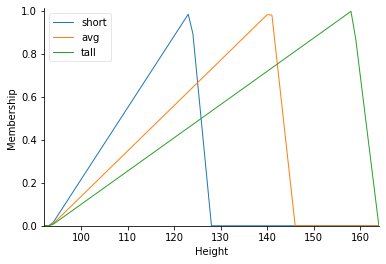

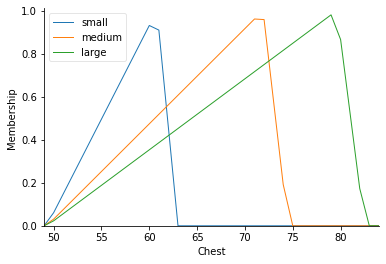

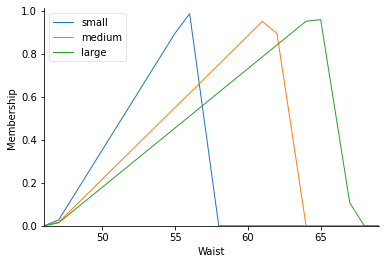

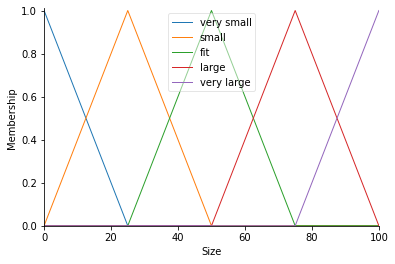

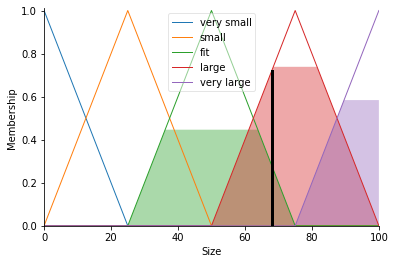

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

height = ctrl.Antecedent(np.arange(92, 165, 1), 'Height')
chest = ctrl.Antecedent(np.arange(49,85,1), 'Chest')
waist = ctrl.Antecedent(np.arange(46,70,1), 'Waist')
size = ctrl.Consequent(np.arange(0,101,1), 'Size')

height['short'] = fuzz.trimf(height.universe, [93.5, 123.52, 128])
height['avg'] = fuzz.trimf(height.universe, [93.5, 140.89, 146])
height['tall'] = fuzz.trimf(height.universe, [93.5, 158.26, 164])
height.view()

chest['small'] = fuzz.trimf(chest.universe, [49.3, 60.8, 63])
chest['medium'] = fuzz.trimf(chest.universe, [49.3, 71.89, 74.5])
chest['large'] = fuzz.trimf(chest.universe, [49.3, 79.61, 82.5])
chest.view()

waist['small'] = fuzz.trimf(waist.universe, [46.75, 55.97, 58])
waist['medium'] = fuzz.trimf(waist.universe, [46.75, 61.76, 64])
waist['large'] = fuzz.trimf(waist.universe, [46.75, 64.9, 67.25])
waist.view()

size['very small'] = fuzz.trimf(size.universe, [0, 0, 25])
size['small'] = fuzz.trimf(size.universe, [0, 25, 50])
size['fit'] = fuzz.trimf(size.universe, [25, 50, 75])
size['large'] = fuzz.trimf(size.universe, [50, 75, 100])
size['very large'] = fuzz.trimf(size.universe, [75, 100, 100])
size.view()

rule1 = ctrl.Rule((height['short'] & chest['small'] & waist['small']) |
                 (height['avg'] & chest['small'] & waist['small']) |
                 (height['short'] & chest['medium'] & waist['small']) |
                 (height['short'] & chest['small'] & waist['medium']), size['very small'])
rule2 = ctrl.Rule((height['avg'] & chest['medium'] & waist['small']) |
                  (height['short'] & chest['medium'] & waist['medium']) |
                  (height['avg'] & chest['small'] & waist['medium']) |
                  (height['tall'] & chest['small'] & waist['small']) |
                  (height['short'] & chest['large'] & waist['small']) |
                  (height['short'] & chest['small'] & waist['large']), size['small'])
rule3 = ctrl.Rule((height['avg'] & chest['medium'] & waist['medium']) |
                  (height['tall'] & chest['medium'] & waist['small']) |
                  (height['short'] & chest['large'] & waist['medium']) |
                  (height['tall'] & chest['small'] & waist['large']) |
                  (height['avg'] & chest['small'] & waist['large']) |
                  (height['short'] & chest['medium'] & waist['large']) |
                  (height['avg'] & chest['large'] & waist['small']), size['fit'])
rule4 = ctrl.Rule((height['tall'] & chest['medium'] & waist['medium']) |
                  (height['avg'] & chest['large'] & waist['medium']) |
                  (height['avg'] & chest['medium'] & waist['large']) |
                  (height['tall'] & chest['large'] & waist['small']) |
                  (height['short'] & chest['large'] & waist['large']) |
                  (height['tall'] & chest['small'] & waist['large']), size['large'])
rule5 = ctrl.Rule((height['tall'] & chest['large'] & waist['medium']) |
                  (height['avg'] & chest['large'] & waist['large']) |
                  (height['tall'] & chest['medium'] & waist['large']) |
                  (height['tall'] & chest['large'] & waist['large']), size['very large'])

size_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
size_sim = ctrl.ControlSystemSimulation(size_ctrl)
size_sim.input['Height'] = 128.5
size_sim.input['Chest'] = 67
size_sim.input['Waist'] = 63
size_sim.compute()
print(size_sim.output['Size'])
size.view(sim = size_sim)